# SQL in Python - Connecting to and retrieving data from PostgreSQL

Previously, you have learned how to connect to a SQL database by using a SQL client such as DBeaver. Apart from connecting to databases, DBeaver also allows you to run SQL queries against the database, create new tables and populate them with data as well as retrieving the data.

Python also allows executing SQL queries and getting the result into a Python object, for example a Pandas data frame. Instead of exporting a .csv file from DBeaver you can directly get the data you need into Python and continue your work. In addition we can reduce the steps by connecting to the database from Python directly, eliminating the need for a separate SQL client.

After you have the data in Python in the required shape you can export the data into a .csv file. This file is for your own reference, please avoid sending .csv files around - database is the point of reference when it comes to data. 

Having a copy of a .csv file (or another format) can speed up your analysis work. Imagine that the query takes 25 minutes to run. If you made some mistakes in your Python code you might need to go back to the original dataset. Instead of having to rerun the SQL query and having to wait you can read in the .csv file you have previously saved on your hard disk into Python and continue with your analysis work. 

**In this notebook you will see 2 ways to connect to SQL-Databases and export the data to a CSV file**


## Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [389]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [390]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [391]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [392]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [393]:
cur.execute('SELECT * FROM eda.king_county_house_sales AS sales INNER JOIN eda.king_county_house_details AS details ON details.id=sales.house_id ORDER BY sales."date"')
cur.fetchall()

[(datetime.date(2014, 5, 2),
  1400000.0,
  4217401055,
  4332,
  4217401055,
  4.0,
  2.5,
  2920.0,
  4000.0,
  1.5,
  0.0,
  0.0,
  5,
  8,
  1910.0,
  1010.0,
  1909,
  0,
  98105,
  47.6578,
  -122.28,
  2470.0,
  4000.0),
 (datetime.date(2014, 5, 2),
  365000.0,
  3390600010,
  4998,
  3390600010,
  3.0,
  1.0,
  1090.0,
  6435.0,
  1.0,
  0.0,
  0.0,
  4,
  7,
  1090.0,
  None,
  1955,
  0,
  98106,
  47.5334,
  -122.365,
  1340.0,
  6435.0),
 (datetime.date(2014, 5, 2),
  463000.0,
  7739100015,
  3720,
  7739100015,
  3.0,
  1.75,
  1710.0,
  7320.0,
  1.0,
  0.0,
  0.0,
  3,
  7,
  1710.0,
  0.0,
  1948,
  0,
  98155,
  47.7512,
  -122.281,
  2260.0,
  8839.0),
 (datetime.date(2014, 5, 2),
  284000.0,
  1525079056,
  17467,
  1525079056,
  3.0,
  1.75,
  1800.0,
  23103.0,
  1.0,
  None,
  0.0,
  3,
  7,
  1800.0,
  0.0,
  1968,
  0,
  98014,
  47.6517,
  -121.906,
  1410.0,
  18163.0),
 (datetime.date(2014, 5, 2),
  2380000.0,
  1860600135,
  313,
  1860600135,
  5.0,
  2.5,

With `conn.close()` you can close the connection again.

In [394]:
#close the connection
conn.close()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [395]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [396]:
# import the data into a pandas dataframe
query_string = 'SELECT * FROM eda.king_county_house_sales AS sales INNER JOIN eda.king_county_house_details AS details ON details.id=sales.house_id ORDER BY sales."date"'
df_psycopg = pd.read_sql(query_string, conn)

In [397]:
df_psycopg.shape

(21597, 23)

In [398]:
df_psycopg.tail()

,date,price,house_id,id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,2015-05-14,359000.0,8730000270,928,8730000270,2.0,2.75,1370.0,1140.0,2.0,...,8,1080.0,290.0,2009,0.0,98133,47.7052,-122.343,1370.0,1090.0
21593,2015-05-14,440000.0,7129304540,15798,7129304540,5.0,2.00,1430.0,5600.0,1.5,...,6,1430.0,0.0,1947,NaN,98118,47.5192,-122.266,1860.0,5980.0
21594,2015-05-15,450000.0,7923600250,5633,7923600250,5.0,2.00,1870.0,7344.0,1.5,...,7,1870.0,0.0,1960,0.0,98007,47.5951,-122.144,1870.0,7650.0
21595,2015-05-24,445500.0,5101400871,13041,5101400871,2.0,1.75,1390.0,6670.0,1.0,...,6,720.0,670.0,1941,0.0,98115,47.6914,-122.308,920.0,6380.0
21596,2015-05-27,1310000.0,9106000005,16581,9106000005,4.0,2.25,3750.0,5000.0,2.0,...,8,2440.0,1310.0,1924,0.0,98115,47.6747,-122.303,2170.0,4590.0


In [399]:
#close the connection
conn.close()

In [400]:
df_psycopg.head()

,date,price,house_id,id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-05-02,1400000.0,4217401055,4332,4217401055,4.0,2.50,2920.0,4000.0,1.5,...,8,1910.0,1010.0,1909,0.0,98105,47.6578,-122.280,2470.0,4000.0
1,2014-05-02,365000.0,3390600010,4998,3390600010,3.0,1.00,1090.0,6435.0,1.0,...,7,1090.0,NaN,1955,0.0,98106,47.5334,-122.365,1340.0,6435.0
2,2014-05-02,463000.0,7739100015,3720,7739100015,3.0,1.75,1710.0,7320.0,1.0,...,7,1710.0,0.0,1948,0.0,98155,47.7512,-122.281,2260.0,8839.0
3,2014-05-02,284000.0,1525079056,17467,1525079056,3.0,1.75,1800.0,23103.0,1.0,...,7,1800.0,0.0,1968,0.0,98014,47.6517,-121.906,1410.0,18163.0
4,2014-05-02,2380000.0,1860600135,313,1860600135,5.0,2.50,3650.0,9050.0,2.0,...,10,3370.0,280.0,1921,0.0,98119,47.6345,-122.367,2880.0,5400.0


In [401]:
#export the data to a csv-file
df_psycopg.to_csv('data/eda.csv',index=False)

### Connecting and retrieving data via SQLAlchemy

`sqlalchemy` works similarly. Here you have to create an engine with the database sting (a link that includes every information we entered in the conn object)

In [402]:
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

And then you can import that engine with a query into a pandas dataframe.

In [403]:
#import the data to a pandas dataframe
query_string = 'SELECT * FROM eda.king_county_house_sales AS sales INNER JOIN eda.king_county_house_details AS details ON details.id=sales.house_id ORDER BY sales."date"'
df_sqlalchemy = pd.read_sql(query_string, db)

In [404]:
df_sqlalchemy.head(20)

,date,price,house_id,id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-05-02,1400000.0,4217401055,4332,4217401055,4.0,2.50,2920.0,4000.0,1.5,...,8,1910.0,1010.0,1909,0.0,98105,47.6578,-122.280,2470.0,4000.0
1,2014-05-02,365000.0,3390600010,4998,3390600010,3.0,1.00,1090.0,6435.0,1.0,...,7,1090.0,NaN,1955,0.0,98106,47.5334,-122.365,1340.0,6435.0
2,2014-05-02,463000.0,7739100015,3720,7739100015,3.0,1.75,1710.0,7320.0,1.0,...,7,1710.0,0.0,1948,0.0,98155,47.7512,-122.281,2260.0,8839.0
3,2014-05-02,284000.0,1525079056,17467,1525079056,3.0,1.75,1800.0,23103.0,1.0,...,7,1800.0,0.0,1968,0.0,98014,47.6517,-121.906,1410.0,18163.0
4,2014-05-02,2380000.0,1860600135,313,1860600135,5.0,2.50,3650.0,9050.0,2.0,...,10,3370.0,280.0,1921,0.0,98119,47.6345,-122.367,2880.0,5400.0
5,2014-05-02,495000.0,5101405331,7955,5101405331,4.0,1.75,1600.0,6380.0,1.0,...,8,1130.0,470.0,1959,NaN,98125,47.7010,-122.306,1090.0,6380.0
6,2014-05-02,588500.0,7525000080,4960,7525000080,3.0,1.75,2330.0,14892.0,1.0,...,8,1970.0,360.0,1980,0.0,98074,47.6267,-122.046,2570.0,14217.0
7,2014-05-02,838000.0,2326059099,17025,2326059099,4.0,2.50,3310.0,42998.0,2.0,...,9,3310.0,0.0,2001,NaN,98052,47.7232,-122.131,3350.0,42847.0
8,2014-05-02,790000.0,472000620,9588,472000620,3.0,2.50,2600.0,4750.0,1.0,...,9,1700.0,900.0,1951,0.0,98117,47.6833,-122.400,2380.0,4750.0
9,2014-05-02,295000.0,3438501320,20544,3438501320,2.0,2.50,1630.0,1368.0,2.0,...,7,1280.0,350.0,2009,0.0,98106,47.5489,-122.363,1590.0,2306.0


Because we don't want to run the queries over and over again we can export the data into a .csv file in order to use it in other notebooks as well. 

In [405]:
#export the data to a csv-file
df_sqlalchemy.to_csv('eda.csv',index=False)

In [406]:
#import the data from a csv-file
df_housing = pd.read_csv('data/eda.csv')

In [407]:
df_housing.describe()

,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,...,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,4.580474e+09,10799.000000,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,...,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512
std,3.673681e+05,2.876736e+09,6234.661218,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,...,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000102e+06,1.000000,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,2.123049e+09,5400.000000,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.904930e+09,10799.000000,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,7.308900e+09,16198.000000,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,9.900000e+09,21597.000000,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [408]:
df_housing.columns = df_housing.columns.str.replace(' ','_')
df_housing.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [409]:
df_housing.columns = df_housing.columns.str.lower()
df_housing.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [410]:
df_housing.drop('id.1', axis=1, inplace=True)
df_housing.head()


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-05-02,1400000.0,4217401055,4332,4.0,2.50,2920.0,4000.0,1.5,0.0,...,8,1910.0,1010.0,1909,0.0,98105,47.6578,-122.280,2470.0,4000.0
1,2014-05-02,365000.0,3390600010,4998,3.0,1.00,1090.0,6435.0,1.0,0.0,...,7,1090.0,NaN,1955,0.0,98106,47.5334,-122.365,1340.0,6435.0
2,2014-05-02,463000.0,7739100015,3720,3.0,1.75,1710.0,7320.0,1.0,0.0,...,7,1710.0,0.0,1948,0.0,98155,47.7512,-122.281,2260.0,8839.0
3,2014-05-02,284000.0,1525079056,17467,3.0,1.75,1800.0,23103.0,1.0,NaN,...,7,1800.0,0.0,1968,0.0,98014,47.6517,-121.906,1410.0,18163.0
4,2014-05-02,2380000.0,1860600135,313,5.0,2.50,3650.0,9050.0,2.0,0.0,...,10,3370.0,280.0,1921,0.0,98119,47.6345,-122.367,2880.0,5400.0


In [411]:
df_housing.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [412]:
df_housing.dtypes

date              object
price            float64
house_id           int64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [413]:
type(df_housing['date'][0])

str

In [414]:
df_housing['date'] = pd.to_datetime(df_housing['date'], format='%Y/%m/%d')

In [415]:
type(df_housing['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [416]:
df_housing = df_housing.astype({'sqft_basement': float})

In [417]:
import numpy as np

In [418]:
#change the type of objects inside the waterfront columns to integer
df_housing['waterfront'] = df_housing['waterfront'].map(lambda x: round(x) if pd.notnull(x) else np.nan).astype('Int64')
df_housing.head(20)


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-05-02,1400000.0,4217401055,4332,4.0,2.50,2920.0,4000.0,1.5,0,...,8,1910.0,1010.0,1909,0.0,98105,47.6578,-122.280,2470.0,4000.0
1,2014-05-02,365000.0,3390600010,4998,3.0,1.00,1090.0,6435.0,1.0,0,...,7,1090.0,NaN,1955,0.0,98106,47.5334,-122.365,1340.0,6435.0
2,2014-05-02,463000.0,7739100015,3720,3.0,1.75,1710.0,7320.0,1.0,0,...,7,1710.0,0.0,1948,0.0,98155,47.7512,-122.281,2260.0,8839.0
3,2014-05-02,284000.0,1525079056,17467,3.0,1.75,1800.0,23103.0,1.0,<NA>,...,7,1800.0,0.0,1968,0.0,98014,47.6517,-121.906,1410.0,18163.0
4,2014-05-02,2380000.0,1860600135,313,5.0,2.50,3650.0,9050.0,2.0,0,...,10,3370.0,280.0,1921,0.0,98119,47.6345,-122.367,2880.0,5400.0
5,2014-05-02,495000.0,5101405331,7955,4.0,1.75,1600.0,6380.0,1.0,0,...,8,1130.0,470.0,1959,NaN,98125,47.7010,-122.306,1090.0,6380.0
6,2014-05-02,588500.0,7525000080,4960,3.0,1.75,2330.0,14892.0,1.0,0,...,8,1970.0,360.0,1980,0.0,98074,47.6267,-122.046,2570.0,14217.0
7,2014-05-02,838000.0,2326059099,17025,4.0,2.50,3310.0,42998.0,2.0,0,...,9,3310.0,0.0,2001,NaN,98052,47.7232,-122.131,3350.0,42847.0
8,2014-05-02,790000.0,472000620,9588,3.0,2.50,2600.0,4750.0,1.0,0,...,9,1700.0,900.0,1951,0.0,98117,47.6833,-122.400,2380.0,4750.0
9,2014-05-02,295000.0,3438501320,20544,2.0,2.50,1630.0,1368.0,2.0,0,...,7,1280.0,350.0,2009,0.0,98106,47.5489,-122.363,1590.0,2306.0


In [419]:
df_housing.dtypes

date             datetime64[ns]
price                   float64
house_id                  int64
id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                Int64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

In [420]:
df_housing['sqft_basement'] = df_housing['sqft_basement'].map(lambda x: round(x) if pd.notnull(x) else np.nan).astype('Int64')
df_housing.tail(20)

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21577,2015-05-13,165000.0,2698200010,6436,3.0,1.00,1380.0,7334.0,1.0,0,...,7,980.0,400,1981,0.0,98055,47.4339,-122.192,1910.0,7859.0
21578,2015-05-13,900000.0,9828700685,11900,3.0,1.75,1540.0,8400.0,1.5,<NA>,...,7,1540.0,0,1902,0.0,98122,47.6187,-122.295,1330.0,4800.0
21579,2015-05-13,204750.0,2122049013,7888,2.0,1.00,880.0,7575.0,1.0,0,...,7,880.0,0,1942,0.0,98198,47.3757,-122.304,1800.0,7575.0
21580,2015-05-13,500000.0,3764650010,17488,3.0,2.50,2300.0,4307.0,2.0,0,...,8,2300.0,0,1998,0.0,98034,47.7326,-122.197,2010.0,4307.0
21581,2015-05-13,480000.0,3649100015,19501,3.0,2.25,1820.0,15000.0,1.0,0,...,7,1480.0,340,1978,0.0,98028,47.7401,-122.249,1930.0,13600.0
21582,2015-05-13,330000.0,7399000360,8475,4.0,1.75,1720.0,8300.0,1.0,0,...,8,1720.0,0,1965,0.0,98055,47.4654,-122.194,1840.0,8300.0
21583,2015-05-14,855000.0,6815100380,17384,3.0,1.75,1900.0,4000.0,1.0,0,...,7,1300.0,600,1965,NaN,98103,47.6854,-122.331,1880.0,4000.0
21584,2015-05-14,479349.0,5057100110,20457,5.0,3.00,3223.0,6371.0,2.0,0,...,9,3223.0,0,2014,0.0,98042,47.3584,-122.163,1979.0,9008.0
21585,2015-05-14,1700000.0,9178601660,6192,5.0,3.00,3320.0,5354.0,2.0,<NA>,...,9,3320.0,0,2004,0.0,98103,47.6542,-122.331,2330.0,4040.0
21586,2015-05-14,749950.0,8562790720,21435,4.0,3.50,2630.0,3757.0,2.0,0,...,10,2200.0,430,2008,0.0,98027,47.5322,-122.075,2620.0,2699.0


In [421]:
df_housing['yr_renovated'] = df_housing['yr_renovated'].map(lambda x: round(x)/ 10 if pd.notnull(x) else np.nan).astype('Int64')
df_housing.head(20)

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-05-02,1400000.0,4217401055,4332,4.0,2.50,2920.0,4000.0,1.5,0,...,8,1910.0,1010,1909,0,98105,47.6578,-122.280,2470.0,4000.0
1,2014-05-02,365000.0,3390600010,4998,3.0,1.00,1090.0,6435.0,1.0,0,...,7,1090.0,<NA>,1955,0,98106,47.5334,-122.365,1340.0,6435.0
2,2014-05-02,463000.0,7739100015,3720,3.0,1.75,1710.0,7320.0,1.0,0,...,7,1710.0,0,1948,0,98155,47.7512,-122.281,2260.0,8839.0
3,2014-05-02,284000.0,1525079056,17467,3.0,1.75,1800.0,23103.0,1.0,<NA>,...,7,1800.0,0,1968,0,98014,47.6517,-121.906,1410.0,18163.0
4,2014-05-02,2380000.0,1860600135,313,5.0,2.50,3650.0,9050.0,2.0,0,...,10,3370.0,280,1921,0,98119,47.6345,-122.367,2880.0,5400.0
5,2014-05-02,495000.0,5101405331,7955,4.0,1.75,1600.0,6380.0,1.0,0,...,8,1130.0,470,1959,<NA>,98125,47.7010,-122.306,1090.0,6380.0
6,2014-05-02,588500.0,7525000080,4960,3.0,1.75,2330.0,14892.0,1.0,0,...,8,1970.0,360,1980,0,98074,47.6267,-122.046,2570.0,14217.0
7,2014-05-02,838000.0,2326059099,17025,4.0,2.50,3310.0,42998.0,2.0,0,...,9,3310.0,0,2001,<NA>,98052,47.7232,-122.131,3350.0,42847.0
8,2014-05-02,790000.0,472000620,9588,3.0,2.50,2600.0,4750.0,1.0,0,...,9,1700.0,900,1951,0,98117,47.6833,-122.400,2380.0,4750.0
9,2014-05-02,295000.0,3438501320,20544,2.0,2.50,1630.0,1368.0,2.0,0,...,7,1280.0,350,2009,0,98106,47.5489,-122.363,1590.0,2306.0


In [476]:
import pandas as pd
import matplotlib.pyplot as plt

AttributeError: 'Series' object has no attribute 'set_ylabel'

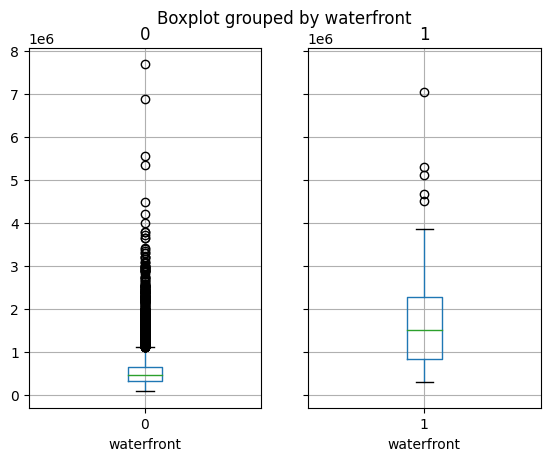

In [478]:
#plot the data based on whether the house has waterfront or not, houses with waterfront are significantly more expensive
ax= df_housing.groupby('waterfront').boxplot(column = 'price', by= 'waterfront')
#plt.title('Box Plot of Price by Waterfront')
plt.xlabel('waterfront')
ax.set_ylabel('Price')



In [ ]:
#drop houses with waterfront based the last boxplot, houses with waterfront tend to be more expensive
df_housing_nowf = df_housing.drop(df_housing[df_housing['waterfront'] == 1].index)
df_housing_nowf


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-05-02,1400000.0,4217401055,4332,4.0,2.50,2920.0,4000.0,1.5,0,...,8,1910.0,1010,1909,0,98105,47.6578,-122.280,2470.0,4000.0
1,2014-05-02,365000.0,3390600010,4998,3.0,1.00,1090.0,6435.0,1.0,0,...,7,1090.0,<NA>,1955,0,98106,47.5334,-122.365,1340.0,6435.0
2,2014-05-02,463000.0,7739100015,3720,3.0,1.75,1710.0,7320.0,1.0,0,...,7,1710.0,0,1948,0,98155,47.7512,-122.281,2260.0,8839.0
3,2014-05-02,284000.0,1525079056,17467,3.0,1.75,1800.0,23103.0,1.0,<NA>,...,7,1800.0,0,1968,0,98014,47.6517,-121.906,1410.0,18163.0
4,2014-05-02,2380000.0,1860600135,313,5.0,2.50,3650.0,9050.0,2.0,0,...,10,3370.0,280,1921,0,98119,47.6345,-122.367,2880.0,5400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2015-05-14,359000.0,8730000270,928,2.0,2.75,1370.0,1140.0,2.0,0,...,8,1080.0,290,2009,0,98133,47.7052,-122.343,1370.0,1090.0
21593,2015-05-14,440000.0,7129304540,15798,5.0,2.00,1430.0,5600.0,1.5,0,...,6,1430.0,0,1947,<NA>,98118,47.5192,-122.266,1860.0,5980.0
21594,2015-05-15,450000.0,7923600250,5633,5.0,2.00,1870.0,7344.0,1.5,0,...,7,1870.0,0,1960,0,98007,47.5951,-122.144,1870.0,7650.0
21595,2015-05-24,445500.0,5101400871,13041,2.0,1.75,1390.0,6670.0,1.0,0,...,6,720.0,670,1941,0,98115,47.6914,-122.308,920.0,6380.0


In [ ]:
#drop houses with less than 3 bedrooms since the family comprise 7 members
df_housing_3 = df_housing_nowf.drop(df_housing_nowf[df_housing_nowf['bedrooms'] < 3].index)
df_housing_3

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-05-02,1400000.0,4217401055,4332,4.0,2.50,2920.0,4000.0,1.5,0,...,8,1910.0,1010,1909,0,98105,47.6578,-122.280,2470.0,4000.0
1,2014-05-02,365000.0,3390600010,4998,3.0,1.00,1090.0,6435.0,1.0,0,...,7,1090.0,<NA>,1955,0,98106,47.5334,-122.365,1340.0,6435.0
2,2014-05-02,463000.0,7739100015,3720,3.0,1.75,1710.0,7320.0,1.0,0,...,7,1710.0,0,1948,0,98155,47.7512,-122.281,2260.0,8839.0
3,2014-05-02,284000.0,1525079056,17467,3.0,1.75,1800.0,23103.0,1.0,<NA>,...,7,1800.0,0,1968,0,98014,47.6517,-121.906,1410.0,18163.0
4,2014-05-02,2380000.0,1860600135,313,5.0,2.50,3650.0,9050.0,2.0,0,...,10,3370.0,280,1921,0,98119,47.6345,-122.367,2880.0,5400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,2015-05-14,183000.0,1422700040,7892,3.0,1.00,1170.0,7320.0,1.0,0,...,7,1170.0,0,1962,0,98188,47.4685,-122.282,2040.0,7320.0
21591,2015-05-14,335000.0,4166600610,12624,3.0,2.00,1410.0,44866.0,1.0,0,...,7,1410.0,0,1985,0,98023,47.3273,-122.370,2950.0,29152.0
21593,2015-05-14,440000.0,7129304540,15798,5.0,2.00,1430.0,5600.0,1.5,0,...,6,1430.0,0,1947,<NA>,98118,47.5192,-122.266,1860.0,5980.0
21594,2015-05-15,450000.0,7923600250,5633,5.0,2.00,1870.0,7344.0,1.5,0,...,7,1870.0,0,1960,0,98007,47.5951,-122.144,1870.0,7650.0


In [426]:
import matplotlib.pyplot as plt
import pandas as pd

In [427]:
pd.unique(df_housing_3.grade)

array([ 8,  7, 10,  9,  6, 11, 12,  5, 13,  4])

In [428]:
pd.unique(df_housing_3.condition)

array([5, 4, 3, 2, 1])

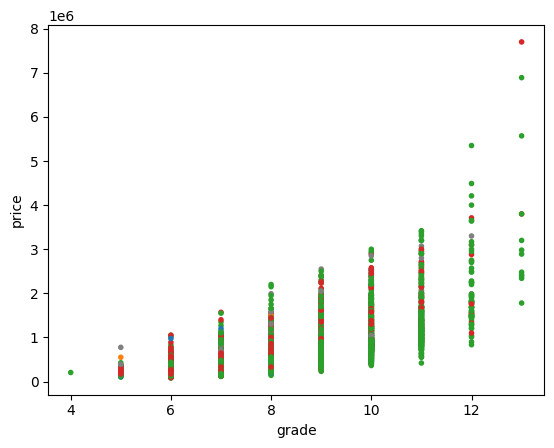

In [436]:
price = df_housing_3.price
grade = df_housing_3.grade
#conditions = {1:'tab:orange', 2:'tab:blue', 3:'tab:green', 4:'tab:red', 5:'tab:gray'}
plt.scatter(grade, price, c = df_housing_3['condition'].map(conditions), marker = '.')
plt.xlabel('grade')
plt.ylabel('price')
#plt.xticks(rotation = 45)
#plt.yscale('log')
plt.show()

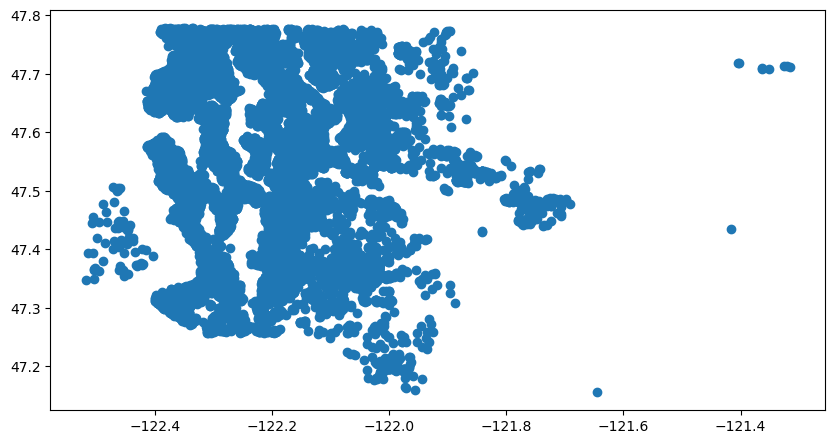

In [469]:
gdf = gpd.GeoDataFrame(df_housing_3, geometry=gpd.points_from_xy(df_housing_3.long, df_housing_3.lat))
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.5)
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf.price, cmap='viridis')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Price')
plt.show()

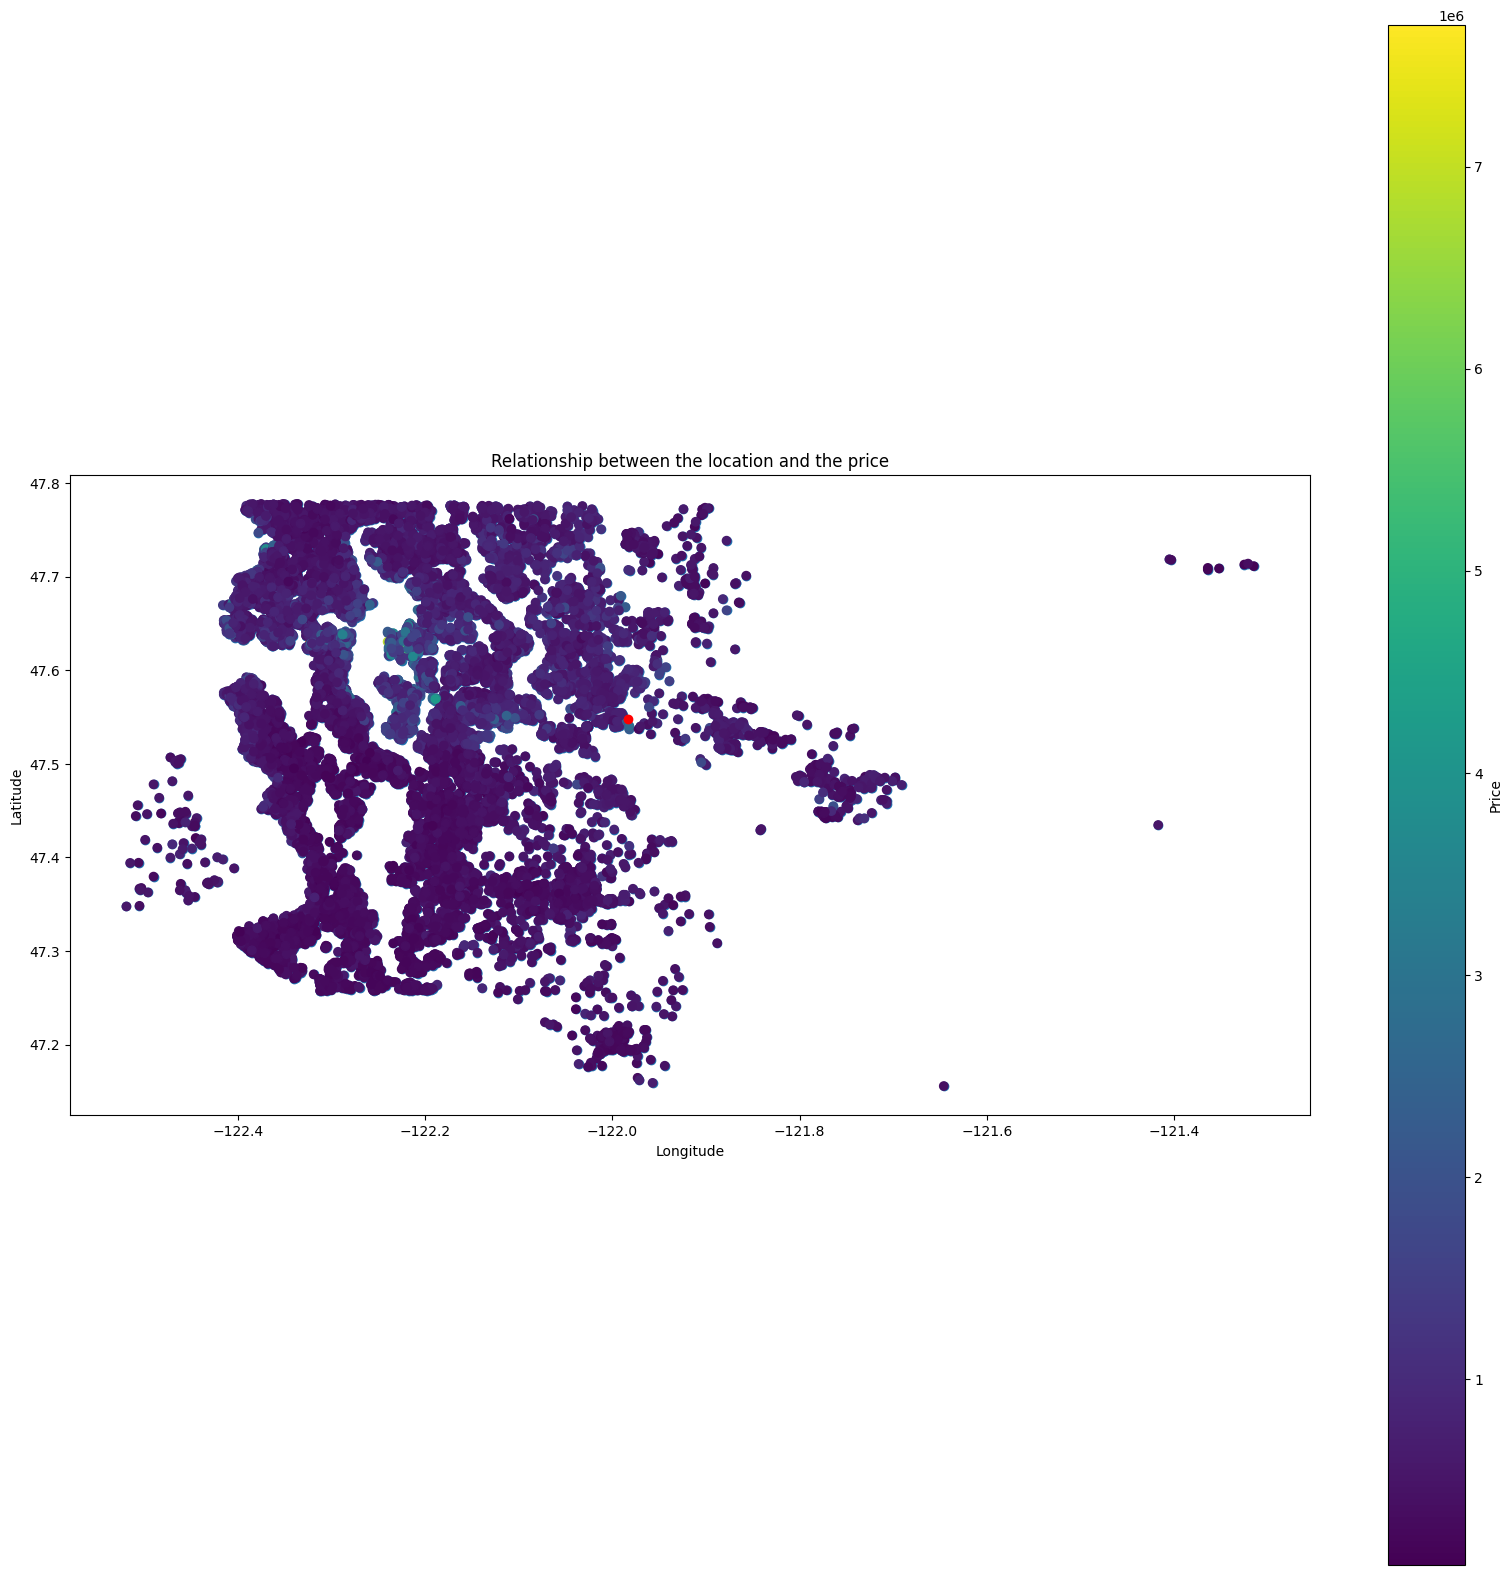

In [484]:
#third hypothesis The closer the house to the center the higher the price
gdf = gpd.GeoDataFrame(df_housing_3, geometry=gpd.points_from_xy(df_housing_3.long, df_housing_3.lat))
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(ax=ax)
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.5)
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf.price, cmap='viridis')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Price')
highlight_longitude = -121.9836
highlight_latitude = 47.5480
plt.scatter(highlight_longitude, highlight_latitude, c='red', label='Highlighted Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relationship between the location and the price')
plt.show()

In [ ]:
import 

In [ ]:
fig = px.scatter_mapbox(kc_data,
                        lat="lat",
                        lon="long",
                        hover_name="id",
                        hover_data=["sqft_price", "sqft_living", "zipcode", 'floors'],
                        size='sqft_price',
                        color='center_distance',
                        color_continuous_scale=['green', 'yellow', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=7.7,
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


Text(0.5, 1.0, 'Relationship between the density and the price')

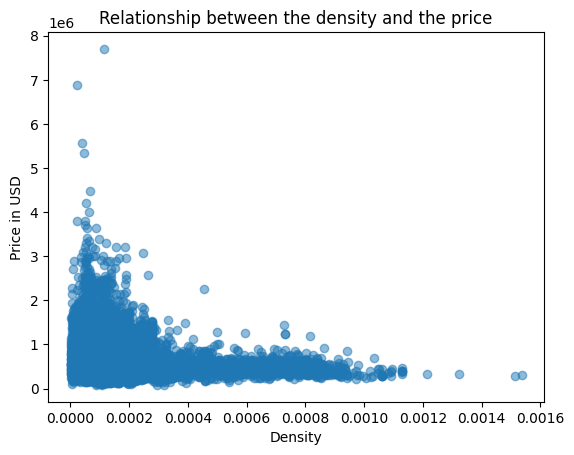

In [483]:
plt.scatter(1/df_housing_3['sqft_lot15'], df_housing_3['price'], alpha= 0.5)
plt.xlabel('Density')
plt.ylabel('Price in USD')
plt.title('Relationship between the density and the price')
#plt.yscale('log')


In [438]:
# correlation between the social neighborhood and price
df_housing_3['sqft_lot15'].corr(df_housing_3['price'])
#there is a positive correlation. Houses that are in a dense neighborhood are less expensive

0.08038883088831088

In [442]:
df_housing_3['sqft_lot15'].corr(df_housing_3['grade'])


0.1282988357139046

1         AxesSubplot(0.1,0.679412;0.363636x0.220588)
2    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
3         AxesSubplot(0.1,0.414706;0.363636x0.220588)
4    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
5             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

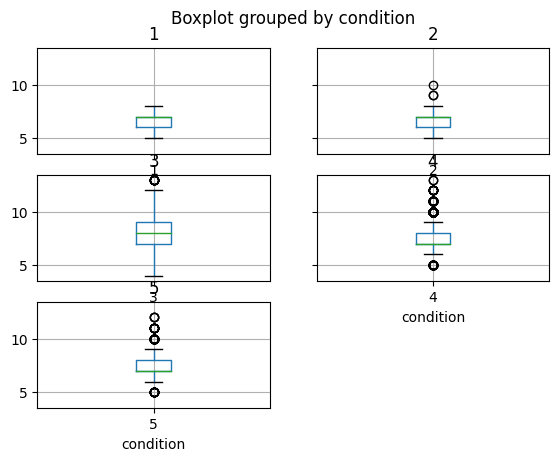

In [437]:
df_housing_3.groupby('condition').boxplot(column = 'grade', by= 'condition')


In [443]:
import geopandas as gpd

In [445]:
gdflow = gpd.GeoDataFrame(df_housing_3, geometry=gpd.points_from_xy(df_housing_3.long, df_housing_3.lat), crs="EPSG:4326")
print(gdflow)

            date      price    house_id     id  bedrooms  bathrooms  \
0     2014-05-02  1400000.0  4217401055   4332       4.0       2.50   
1     2014-05-02   365000.0  3390600010   4998       3.0       1.00   
2     2014-05-02   463000.0  7739100015   3720       3.0       1.75   
3     2014-05-02   284000.0  1525079056  17467       3.0       1.75   
4     2014-05-02  2380000.0  1860600135    313       5.0       2.50   
...          ...        ...         ...    ...       ...        ...   
21590 2015-05-14   183000.0  1422700040   7892       3.0       1.00   
21591 2015-05-14   335000.0  4166600610  12624       3.0       2.00   
21593 2015-05-14   440000.0  7129304540  15798       5.0       2.00   
21594 2015-05-15   450000.0  7923600250   5633       5.0       2.00   
21596 2015-05-27  1310000.0  9106000005  16581       4.0       2.25   

       sqft_living  sqft_lot  floors  waterfront  ...  sqft_above  \
0           2920.0    4000.0     1.5           0  ...      1910.0   
1        

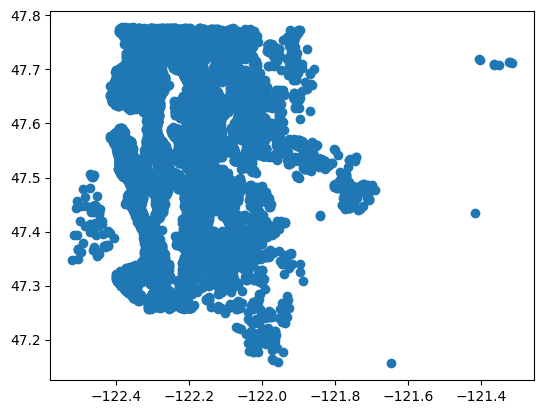

In [446]:
gdflow.plot()
plt.show()

<AxesSubplot:xlabel='long', ylabel='lat'>

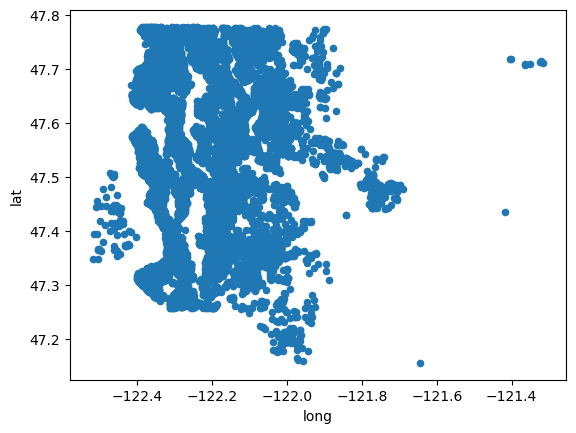

In [447]:
df_housing_3.plot.scatter(x='long', y='lat', colormap ='viridis')